Converged after 3 iterations.
Most common genre in each cluster:
Rating Cluster
Average Rated    Action,Adventure,Sci-Fi
Low Rated        Action,Adventure,Sci-Fi
Top Rated                          Drama
Name: Genre, dtype: object


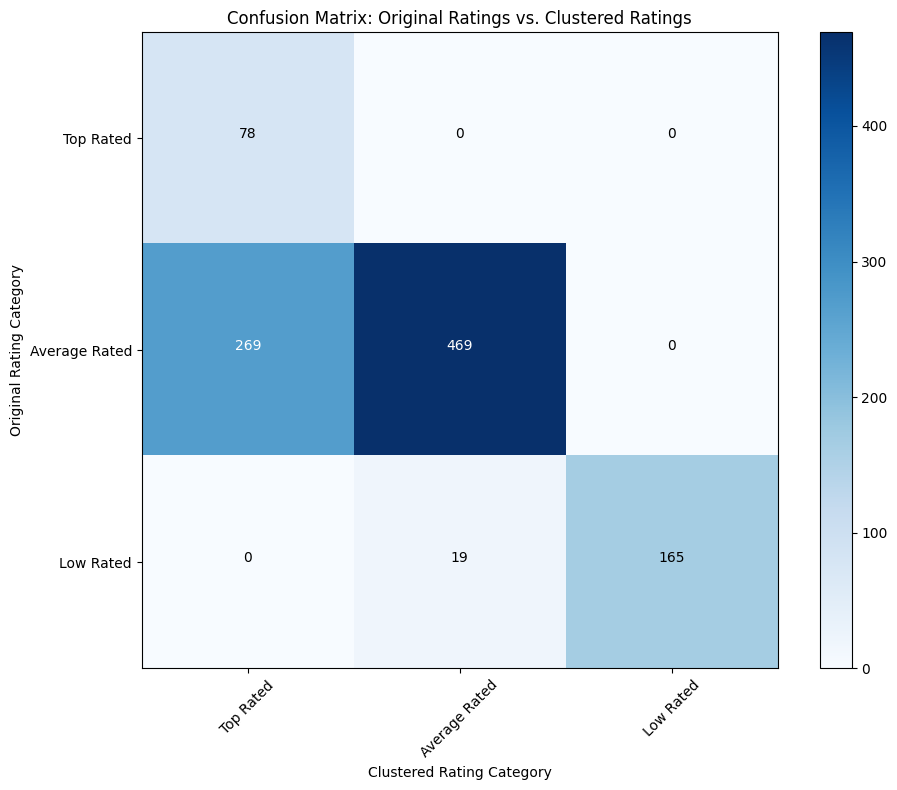

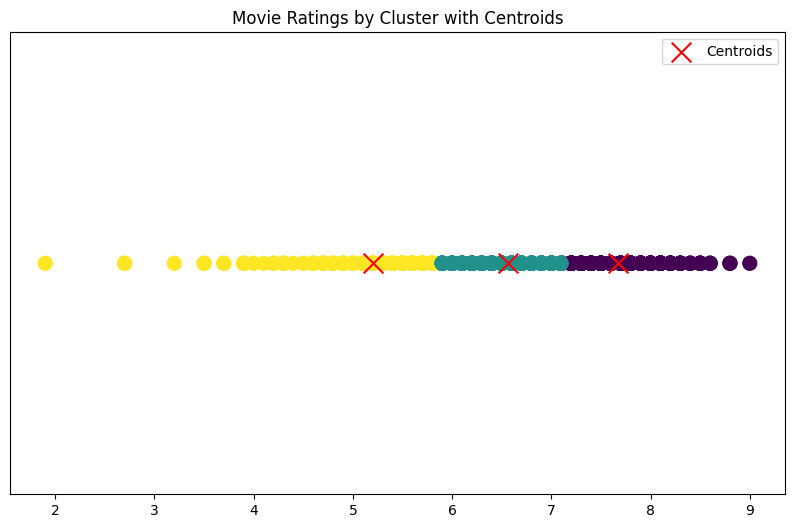

Final Centroids (Rating): [7.67204611 6.56413934 5.19818182]


In [ ]:
# kissa zahra                  i210572                 Q1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'IMDB-Movie-Data.csv'
data = pd.read_csv(file_path)

#preprocessing the data
data = data[['Rank', 'Title', 'Genre', 'Rating']]


def categorize_rating(rating):
  if rating >= 8:
      return 'Top Rated'
  elif 6 <= rating < 8:
      return 'Average Rated'
  else:
      return 'Low Rated'

data['Original Category'] = data['Rating'].apply(categorize_rating)

#Initial centeriods
initial_centroids = np.array([8.0, 6.5, 5.0])

def assign_clusters(ratings, centroids):
  distances = np.abs(ratings[:, np.newaxis] - centroids)   #manhanttan distance; closest to that centroid
  return np.argmin(distances, axis=1)


def recompute_centroids(data, labels, k=3):
  return np.array([data[labels == i].mean() for i in range(k)])

#converting the rating column to numpy array
ratings = data['Rating'].values

#K-means
centroids = initial_centroids
num_iterations = 100   #max iterations

for iteration in range(num_iterations):
  labels = assign_clusters(ratings, centroids)   # ratings is an array
  new_centroids = recompute_centroids(ratings, labels)

  if np.allclose(centroids, new_centroids):   #convergence condition
      print(f'Converged after {iteration+1} iterations.')
      break
  centroids = new_centroids

# Assign final cluster labels
cluster_labels = {0: 'Top Rated', 1: 'Average Rated', 2: 'Low Rated'}
data['Rating Cluster'] = [cluster_labels[label] for label in labels]

#genre Analysis
genre_cluster_analysis = data.groupby('Rating Cluster')['Genre'].agg(lambda x: x.mode()[0])
print("Most common genre in each cluster:")
print(genre_cluster_analysis)

#confusion matrix
def create_confusion_matrix(true_labels, predicted_labels, classes):
  n_classes = len(classes)
  cm = np.zeros((n_classes, n_classes), dtype=int)
  class_to_index = {cls: idx for idx, cls in enumerate(classes)}

  for true, pred in zip(true_labels, predicted_labels):
      true_idx = class_to_index[true]
      pred_idx = class_to_index[pred]
      cm[true_idx, pred_idx] += 1   # this will increment in the diagonal

  return cm

#creating confusion matrix
classes = ['Top Rated', 'Average Rated', 'Low Rated']
cm = create_confusion_matrix(data['Original Category'], data['Rating Cluster'], classes)

#plotting the  confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Original Ratings vs. Clustered Ratings")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):  # iterate over all indexes
  plt.text(j, i, format(cm[i, j], 'd'),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Original Rating Category')
plt.xlabel('Clustered Rating Category')
plt.tight_layout()
plt.show()


#Visualizing the clusters and marking the centroids
plt.figure(figsize=(10, 6))

plt.yticks([])
plt.scatter(data['Rating'], [1]*len(data), c=labels, cmap='viridis', s=100)

plt.scatter(centroids, [1]*len(centroids), color='red', marker='x', s=200, label='Centroids')


plt.title('Movie Ratings by Cluster with Centroids')
plt.legend()

plt.show()

print("Final Centroids:", centroids)


In [ ]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d hojjatk/mnist-dataset
!unzip mnist-dataset.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/hojjatk/mnist-dataset
License(s): copyright-authors
100% 22.0M/22.0M [00:01<00:00, 31.3MB/s]
100% 22.0M/22.0M [00:01<00:00, 19.9MB/s]
Archive:  mnist-dataset.zip
  inflating: t10k-images-idx3-ubyte/t10k-images-idx3-ubyte  
  inflating: t10k-images.idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte  
  inflating: t10k-labels.idx1-ubyte  
  inflating: train-images-idx3-ubyte/train-images-idx3-ubyte  
  inflating: train-images.idx3-ubyte  
  inflating: train-labels-idx1-ubyte/train-labels-idx1-ubyte  
  inflating: train-labels.idx1-ubyte  


In [ ]:
# kissa zahra                  i210572                 Q2
import numpy as np
import struct

def load_images(file):
  with open(file, 'rb') as f:
      _, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
      images = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows * cols)
  return images

def load_labels(file):
  with open(file, 'rb') as f:
      _, num_labels = struct.unpack('>II', f.read(8))
      labels = np.fromfile(f, dtype=np.uint8)
  return labels

train_images = load_images('train-images.idx3-ubyte')
train_labels = load_labels('train-labels.idx1-ubyte')

test_images = load_images('t10k-images.idx3-ubyte')
test_labels = load_labels('t10k-labels.idx1-ubyte')

#normalizing the images
train_images = train_images / 255.0
test_images = test_images / 255.0

print(f"Train images shape: {train_images.shape}, Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}, Test labels shape: {test_labels.shape}")


Train images shape: (60000, 784), Train labels shape: (60000,)
Test images shape: (10000, 784), Test labels shape: (10000,)


In [ ]:
# Reshape the images from 28x28 to 784 (flatten the images)
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

print(train_images.shape)
print(test_images.shape)


(60000, 784)
(10000, 784)


In [3]:
import matplotlib.pyplot as plt

#[:3000]

def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        _, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows * cols)
    return images
def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        _, num = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

train_images = load_mnist_images('train-images.idx3-ubyte')
train_labels = load_mnist_labels('train-labels.idx1-ubyte')

train_images = train_images / 255.0

In [6]:
#splitting the data into trainig and testing

split_index = int(0.8 * len(train_images))
X_train, X_test = train_images[:split_index], train_images[split_index:]
y_train, y_test = train_labels[:split_index], train_labels[split_index:]

In [9]:
#SVM Class Definition with OvR approach
class SVM_OvR:
    def __init__(self, n_classes=10, kernel='linear', learning_rate=0.001, lambda_param=0.01, degree=3, gamma=1, n_iters=1000):
      self.n_classes = n_classes
      self.kernel = kernel
      self.learning_rate = learning_rate
      self.lambda_param = lambda_param
      self.degree = degree
      self.gamma = gamma
      self.n_iters = n_iters
      self.models = {}

    def fit(self, X, y):
      for i in range(self.n_classes):
          print(f"Training SVM for class {i} vs rest")
          y_binary = np.where(y == i, 1, 0)  # Convert to binary labels for ovr approcah
          svm = SVM(kernel=self.kernel, learning_rate=self.learning_rate, lambda_param=self.lambda_param, degree=self.degree, gamma=self.gamma, n_iters=self.n_iters)
          svm.fit(X, y_binary)
          self.models[i] = svm  #appending the model

    def predict(self, X):
      predictions = np.zeros((X.shape[0], self.n_classes))
      for i in range(self.n_classes):
          model = self.models[i]
          predictions[:, i] = model.decision_function(X)
      return np.argmax(predictions, axis=1)  #returns the class with the highest decision score


In [8]:
#binary SVM Class for one vs rest implementation
class SVM:
    def __init__(self, kernel='linear', learning_rate=0.001, lambda_param=0.01, degree=3, gamma=1, n_iters=1000):
      self.kernel = kernel
      self.learning_rate = learning_rate
      self.lambda_param = lambda_param
      self.degree = degree
      self.gamma = gamma
      self.n_iters = n_iters
      self.w = None
      self.b = 0

    def kernel_function(self, x1, x2):
      if self.kernel == 'linear':
          return np.dot(x1, x2)
      elif self.kernel == 'poly':
          return (1 + np.dot(x1, x2)) ** self.degree
      elif self.kernel == 'rbf':
          return np.exp(-self.gamma * np.linalg.norm(x1 - x2) ** 2)
      else:
          raise ValueError("NO kernel :( ")

    def fit(self, X, y):
      n_samples, n_features = X.shape
      self.w = np.zeros(n_features)
      self.b = 0
      for _ in range(self.n_iters):
          for idx, x_i in enumerate(X):
              condition = y[idx] * (self.kernel_function(x_i, self.w) - self.b) >= 1
              if condition:
                  dw = 2 * self.lambda_param * self.w
                  self.w -= self.learning_rate * dw
              else:
                  dw = 2 * self.lambda_param * self.w - np.dot(x_i, y[idx])
                  db = y[idx]
                  self.w -= self.learning_rate * dw
                  self.b -= self.learning_rate * db

    def decision_function(self, X):
      return np.dot(X, self.w) - self.b


In [10]:
#hyperparameter tuning and training for different kernels
kernels = ['linear', 'poly', 'rbf']
degrees = [3, 5]  #polynimial
gammas = [0.1, 0.01]  #rbf

for kernel in kernels:
  print(f"Training SVM with {kernel} kernel")
  if kernel == 'poly':
      for degree in degrees:
          svm_ovr = SVM_OvR(kernel=kernel, degree=degree, n_iters=1000)
          svm_ovr.fit(X_train, y_train)
          y_pred = svm_ovr.predict(X_test)
          accuracy = np.mean(y_pred == y_test) * 100
          print(f"Polynomial Kernel (degree={degree}) Test Accuracy: {accuracy:.2f}%")
  elif kernel == 'rbf':
      for gamma in gammas:
          svm_ovr = SVM_OvR(kernel=kernel, gamma=gamma, n_iters=1000)
          svm_ovr.fit(X_train, y_train)
          y_pred = svm_ovr.predict(X_test)
          accuracy = np.mean(y_pred == y_test) * 100
          print(f"RBF Kernel (gamma={gamma}) Test Accuracy: {accuracy:.2f}%")
  else:
      svm_ovr = SVM_OvR(kernel=kernel, n_iters=1000)
      svm_ovr.fit(X_train, y_train)
      y_pred = svm_ovr.predict(X_test)
      accuracy = np.mean(y_pred == y_test) * 100
      print(f"Linear Kernel Test Accuracy: {accuracy:.2f}%")

Training SVM with linear kernel
Training SVM for class 0 vs rest
Training SVM for class 1 vs rest
Training SVM for class 2 vs rest
Training SVM for class 3 vs rest
Training SVM for class 4 vs rest
Training SVM for class 5 vs rest
Training SVM for class 6 vs rest
Training SVM for class 7 vs rest
Training SVM for class 8 vs rest
Training SVM for class 9 vs rest
Linear Kernel Test Accuracy: 25.33%
Training SVM with poly kernel
Training SVM for class 0 vs rest
Training SVM for class 1 vs rest
Training SVM for class 2 vs rest
Training SVM for class 3 vs rest
Training SVM for class 4 vs rest
Training SVM for class 5 vs rest
Training SVM for class 6 vs rest
Training SVM for class 7 vs rest
Training SVM for class 8 vs rest
Training SVM for class 9 vs rest
Polynomial Kernel (degree=3) Test Accuracy: 10.00%
Training SVM for class 0 vs rest
Training SVM for class 1 vs rest
Training SVM for class 2 vs rest
Training SVM for class 3 vs rest
Training SVM for class 4 vs rest
Training SVM for class 5 v

Training SVM for class 0 vs rest
Training SVM for class 1 vs rest
Training SVM for class 2 vs rest
Training SVM for class 3 vs rest
Training SVM for class 4 vs rest
Training SVM for class 5 vs rest
Training SVM for class 6 vs rest
Training SVM for class 7 vs rest
Training SVM for class 8 vs rest
Training SVM for class 9 vs rest
Accuracy: 25.33%
Confusion Matrix:
 [[42  0  1 16  0  0  0  0  0  1]
 [ 0 11  2 58  3  0  0  0  0  0]
 [ 0  0  5 54  0  0  2  0  0  0]
 [ 0  0  0 63  1  0  0  0  0  0]
 [ 1  0  4 28  0  0  2  0  0 27]
 [ 0  0  2 49  0  0  1  0  0  3]
 [ 1  0  0 45  0  0 17  0  0  0]
 [ 0  0  1 42  0  0  0  2  0 19]
 [ 0  0  1 46  0  0  0  0  0  1]
 [ 0  0  0 35  1  0  1  0  0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.70      0.81        60
           1       1.00      0.15      0.26        74
           2       0.31      0.08      0.13        61
           3       0.14      0.98      0.25        64
        

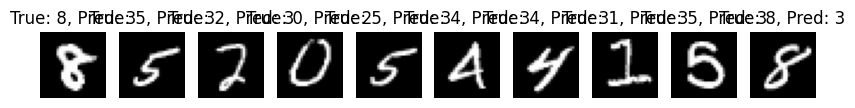

In [11]:
def evaluate_model(y_test, y_pred):
    accuracy = np.mean(y_pred == y_test) * 100
    print(f"Accuracy: {accuracy:.2f}%")

    unique_classes = np.unique(np.concatenate((y_test, y_pred)))  #creating the confusing matrix and getting the unique classes
    cm = np.zeros((len(unique_classes), len(unique_classes)), dtype=int)

    for true, pred in zip(y_test, y_pred):
        cm[true][pred] += 1

    print("Confusion Matrix:\n", cm)

    #classification report
    report = {}
    for cls in unique_classes:
        tp = cm[cls][cls]  #True Positives
        fp = cm[:, cls].sum() - tp  #False Positives
        fn = cm[cls, :].sum() - tp  #False Negatives
        support = cm[cls].sum()  #number of actual instances for the class

        #Calculate precision, recall, and F1-score
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        report[cls] = {
            'precision': precision,
            'recall': recall,
            'f1-score': f1_score,
            'support': support
        }

    #classification report
    print("\nClassification Report:")
    print(f"{'Class':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
    for cls, metrics in report.items():
        print(f"{cls:<10} {metrics['precision']:.2f}     {metrics['recall']:.2f}     {metrics['f1-score']:.2f}      {metrics['support']}")

    #Calculating macro and weighted averages
    macro_precision = np.mean([metrics['precision'] for metrics in report.values()])
    macro_recall = np.mean([metrics['recall'] for metrics in report.values()])
    macro_f1_score = np.mean([metrics['f1-score'] for metrics in report.values()])
    total_support = np.sum([metrics['support'] for metrics in report.values()])

    #calculating weighted averages
    weighted_precision = np.sum([metrics['precision'] * metrics['support'] for metrics in report.values()]) / total_support
    weighted_recall = np.sum([metrics['recall'] * metrics['support'] for metrics in report.values()]) / total_support
    weighted_f1_score = np.sum([metrics['f1-score'] * metrics['support'] for metrics in report.values()]) / total_support

    print("\nMacro Average:")
    print(f"Precision: {macro_precision:.2f}, Recall: {macro_recall:.2f}, F1-Score: {macro_f1_score:.2f}")

    print("\nWeighted Average:")
    print(f"Precision: {weighted_precision:.2f}, Recall: {weighted_recall:.2f}, F1-Score: {weighted_f1_score:.2f}")



# misclassified images visulaition
def visualize_misclassified(X, y_true, y_pred, num_images=10):
  misclassified_idx = np.where(y_true != y_pred)[0]
  plt.figure(figsize=(10, 10))
  for i, idx in enumerate(misclassified_idx[:num_images]):
      plt.subplot(1, num_images, i + 1)
      plt.imshow(X[idx].reshape(28, 28), cmap='gray')
      plt.title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
      plt.axis('off')
  plt.show()

#checking model evalution for linear only
svm_ovr = SVM_OvR(n_classes=10, kernel='linear', learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm_ovr.fit(X_train, y_train)
y_pred = svm_ovr.predict(X_test)

#Evaluate the final model
evaluate_model(y_test, y_pred)

#Visualize the first 10 misclassified digits
visualize_misclassified(X_test, y_test, y_pred, num_images=10)




Training SVM with linear kernel
Training SVM for class 0 vs rest
Training SVM for class 1 vs rest
Training SVM for class 2 vs rest
Training SVM for class 3 vs rest
Training SVM for class 4 vs rest
Training SVM for class 5 vs rest
Training SVM for class 6 vs rest
Training SVM for class 7 vs rest
Training SVM for class 8 vs rest
Training SVM for class 9 vs rest
Linear Kernel Test Accuracy: 25.33%
Evaluating Linear Kernel
Accuracy: 25.33%
Confusion Matrix:
 [[42  0  1 16  0  0  0  0  0  1]
 [ 0 11  2 58  3  0  0  0  0  0]
 [ 0  0  5 54  0  0  2  0  0  0]
 [ 0  0  0 63  1  0  0  0  0  0]
 [ 1  0  4 28  0  0  2  0  0 27]
 [ 0  0  2 49  0  0  1  0  0  3]
 [ 1  0  0 45  0  0 17  0  0  0]
 [ 0  0  1 42  0  0  0  2  0 19]
 [ 0  0  1 46  0  0  0  0  0  1]
 [ 0  0  0 35  1  0  1  0  0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.70      0.81        60
           1       1.00      0.15      0.26        74
           2       0.31

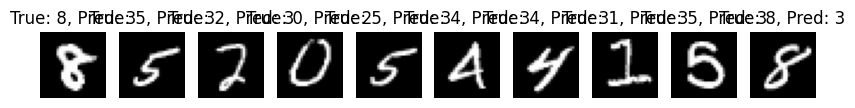

Training SVM with poly kernel
Training SVM for class 0 vs rest
Training SVM for class 1 vs rest
Training SVM for class 2 vs rest
Training SVM for class 3 vs rest
Training SVM for class 4 vs rest
Training SVM for class 5 vs rest
Training SVM for class 6 vs rest
Training SVM for class 7 vs rest
Training SVM for class 8 vs rest
Training SVM for class 9 vs rest
Polynomial Kernel (degree=3) Test Accuracy: 10.00%
Evaluating Polynomial Kernel (degree=3)
Accuracy: 10.00%
Confusion Matrix:
 [[60  0  0  0  0  0  0  0  0  0]
 [74  0  0  0  0  0  0  0  0  0]
 [61  0  0  0  0  0  0  0  0  0]
 [64  0  0  0  0  0  0  0  0  0]
 [62  0  0  0  0  0  0  0  0  0]
 [55  0  0  0  0  0  0  0  0  0]
 [63  0  0  0  0  0  0  0  0  0]
 [64  0  0  0  0  0  0  0  0  0]
 [48  0  0  0  0  0  0  0  0  0]
 [49  0  0  0  0  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.10      1.00      0.18        60
           1       0.00      0.00      0.00      

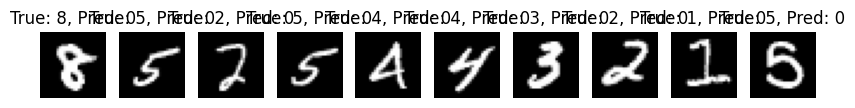

Training SVM for class 0 vs rest
Training SVM for class 1 vs rest
Training SVM for class 2 vs rest
Training SVM for class 3 vs rest
Training SVM for class 4 vs rest
Training SVM for class 5 vs rest
Training SVM for class 6 vs rest
Training SVM for class 7 vs rest
Training SVM for class 8 vs rest
Training SVM for class 9 vs rest
Polynomial Kernel (degree=5) Test Accuracy: 10.00%
Evaluating Polynomial Kernel (degree=5)
Accuracy: 10.00%
Confusion Matrix:
 [[60  0  0  0  0  0  0  0  0  0]
 [74  0  0  0  0  0  0  0  0  0]
 [61  0  0  0  0  0  0  0  0  0]
 [64  0  0  0  0  0  0  0  0  0]
 [62  0  0  0  0  0  0  0  0  0]
 [55  0  0  0  0  0  0  0  0  0]
 [63  0  0  0  0  0  0  0  0  0]
 [64  0  0  0  0  0  0  0  0  0]
 [48  0  0  0  0  0  0  0  0  0]
 [49  0  0  0  0  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.10      1.00      0.18        60
           1       0.00      0.00      0.00        74
           2       0.00  

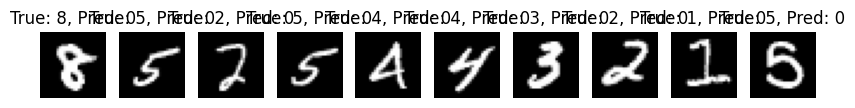

Training SVM with rbf kernel
Training SVM for class 0 vs rest
Training SVM for class 1 vs rest
Training SVM for class 2 vs rest
Training SVM for class 3 vs rest
Training SVM for class 4 vs rest
Training SVM for class 5 vs rest
Training SVM for class 6 vs rest
Training SVM for class 7 vs rest
Training SVM for class 8 vs rest
Training SVM for class 9 vs rest
RBF Kernel (gamma=0.1) Test Accuracy: 10.00%
Evaluating RBF Kernel (gamma=0.1)
Accuracy: 10.00%
Confusion Matrix:
 [[60  0  0  0  0  0  0  0  0  0]
 [74  0  0  0  0  0  0  0  0  0]
 [61  0  0  0  0  0  0  0  0  0]
 [64  0  0  0  0  0  0  0  0  0]
 [62  0  0  0  0  0  0  0  0  0]
 [55  0  0  0  0  0  0  0  0  0]
 [63  0  0  0  0  0  0  0  0  0]
 [64  0  0  0  0  0  0  0  0  0]
 [48  0  0  0  0  0  0  0  0  0]
 [49  0  0  0  0  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.10      1.00      0.18        60
           1       0.00      0.00      0.00        74
        

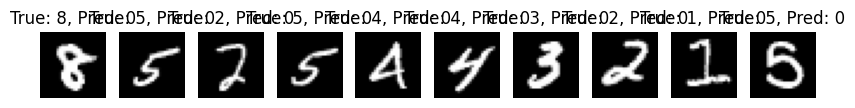

Training SVM for class 0 vs rest
Training SVM for class 1 vs rest
Training SVM for class 2 vs rest
Training SVM for class 3 vs rest
Training SVM for class 4 vs rest
Training SVM for class 5 vs rest
Training SVM for class 6 vs rest
Training SVM for class 7 vs rest
Training SVM for class 8 vs rest
Training SVM for class 9 vs rest
RBF Kernel (gamma=0.01) Test Accuracy: 10.00%
Evaluating RBF Kernel (gamma=0.01)
Accuracy: 10.00%
Confusion Matrix:
 [[60  0  0  0  0  0  0  0  0  0]
 [74  0  0  0  0  0  0  0  0  0]
 [61  0  0  0  0  0  0  0  0  0]
 [64  0  0  0  0  0  0  0  0  0]
 [62  0  0  0  0  0  0  0  0  0]
 [55  0  0  0  0  0  0  0  0  0]
 [63  0  0  0  0  0  0  0  0  0]
 [64  0  0  0  0  0  0  0  0  0]
 [48  0  0  0  0  0  0  0  0  0]
 [49  0  0  0  0  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.10      1.00      0.18        60
           1       0.00      0.00      0.00        74
           2       0.00      0.00  

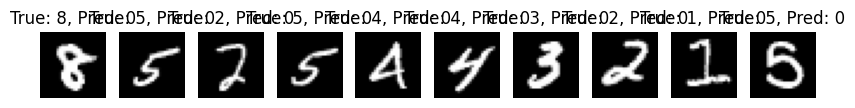

In [12]:
# running it for every kernel
kernels = ['linear', 'poly', 'rbf']
degrees = [3, 5]  # polynomial kernel
gammas = [0.1, 0.01]  #RBF kernel

for kernel in kernels:
    print(f"Training SVM with {kernel} kernel")

    if kernel == 'poly':
        for degree in degrees:
            svm_ovr = SVM_OvR(kernel=kernel, degree=degree, n_iters=1000)
            svm_ovr.fit(X_train, y_train)
            y_pred = svm_ovr.predict(X_test)
            accuracy = np.mean(y_pred == y_test) * 100
            print(f"Polynomial Kernel (degree={degree}) Test Accuracy: {accuracy:.2f}%")

            # Evaluate and visualize for polynomial kernel
            print(f"Evaluating Polynomial Kernel (degree={degree})")
            evaluate_model(y_test, y_pred)
            visualize_misclassified(X_test, y_test, y_pred, num_images=10)

    elif kernel == 'rbf':
        for gamma in gammas:
            svm_ovr = SVM_OvR(kernel=kernel, gamma=gamma, n_iters=1000)
            svm_ovr.fit(X_train, y_train)
            y_pred = svm_ovr.predict(X_test)
            accuracy = np.mean(y_pred == y_test) * 100
            print(f"RBF Kernel (gamma={gamma}) Test Accuracy: {accuracy:.2f}%")

            # Evaluate and visualize for RBF kernel
            print(f"Evaluating RBF Kernel (gamma={gamma})")
            evaluate_model(y_test, y_pred)
            visualize_misclassified(X_test, y_test, y_pred, num_images=10)

    else:
        svm_ovr = SVM_OvR(kernel=kernel, n_iters=1000)
        svm_ovr.fit(X_train, y_train)
        y_pred = svm_ovr.predict(X_test)
        accuracy = np.mean(y_pred == y_test) * 100
        print(f"Linear Kernel Test Accuracy: {accuracy:.2f}%")

        # Evaluate and visualize for linear kernel
        print("Evaluating Linear Kernel")
        evaluate_model(y_test, y_pred)
        visualize_misclassified(X_test, y_test, y_pred, num_images=10)


Display the first 10 misclassified images along with the predicted label and the true label


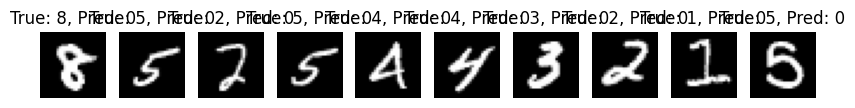

In [15]:
def visualize_misclassified(X, y_true, y_pred, num_images=10):
    misclassified_idx = np.where(y_true != y_pred)[0]
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(misclassified_idx[:num_images]):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
        plt.axis('off')
    plt.show()

print("Display the first 10 misclassified images along with the predicted label and the true label")

visualize_misclassified(X_test, y_test, y_pred, num_images=10)

In [18]:
#Comparing the kernel performance and regularization impact
def compare_kernels_and_regularization():
    kernels = ['linear', 'poly', 'rbf']
    degrees = [3, 5]  #polynomial kernel
    gammas = [0.1, 0.01]  #RBF kernel
    regularization_params = [0.001, 0.01, 0.1, 1]  #values for regularization

    kernel_results = {}

    for kernel in kernels:
        for reg_param in regularization_params:
            if kernel == 'poly':
                for degree in degrees:
                    print(f"Evaluating Polynomial Kernel (degree={degree}, regularization={reg_param})")
                    svm_ovr = SVM_OvR(kernel=kernel, degree=degree, lambda_param=reg_param, n_iters=1000)
                    svm_ovr.fit(X_train, y_train)
                    y_pred = svm_ovr.predict(X_test)
                    accuracy = np.mean(y_pred == y_test) * 100
                    kernel_results[f'Polynomial Kernel (degree={degree}, reg={reg_param})'] = accuracy
                    print(f"Accuracy: {accuracy:.2f}%")

            elif kernel == 'rbf':
                for gamma in gammas:
                    print(f"Evaluating RBF Kernel (gamma={gamma}, regularization={reg_param})")
                    svm_ovr = SVM_OvR(kernel=kernel, gamma=gamma, lambda_param=reg_param, n_iters=1000)
                    svm_ovr.fit(X_train, y_train)
                    y_pred = svm_ovr.predict(X_test)
                    accuracy = np.mean(y_pred == y_test) * 100
                    kernel_results[f'RBF Kernel (gamma={gamma}, reg={reg_param})'] = accuracy
                    print(f"Accuracy: {accuracy:.2f}%")

            else:  # Linear kernel
                print(f"Evaluating Linear Kernel (regularization={reg_param})")
                svm_ovr = SVM_OvR(kernel=kernel, lambda_param=reg_param, n_iters=1000)
                svm_ovr.fit(X_train, y_train)
                y_pred = svm_ovr.predict(X_test)
                accuracy = np.mean(y_pred == y_test) * 100
                kernel_results[f'Linear Kernel (reg={reg_param})'] = accuracy
                print(f"Accuracy: {accuracy:.2f}%")

    # final comparison results
    print("\nKernel Performance and Regularization Comparison:")
    for kernel, acc in kernel_results.items():
        print(f"{kernel}: {acc:.2f}% accuracy")


In [19]:
compare_kernels_and_regularization()

Evaluating Linear Kernel (regularization=0.001)
Training SVM for class 0 vs rest
Training SVM for class 1 vs rest
Training SVM for class 2 vs rest
Training SVM for class 3 vs rest
Training SVM for class 4 vs rest
Training SVM for class 5 vs rest
Training SVM for class 6 vs rest
Training SVM for class 7 vs rest
Training SVM for class 8 vs rest
Training SVM for class 9 vs rest
Accuracy: 65.17%
Evaluating Linear Kernel (regularization=0.01)
Training SVM for class 0 vs rest
Training SVM for class 1 vs rest
Training SVM for class 2 vs rest
Training SVM for class 3 vs rest
Training SVM for class 4 vs rest
Training SVM for class 5 vs rest
Training SVM for class 6 vs rest
Training SVM for class 7 vs rest
Training SVM for class 8 vs rest
Training SVM for class 9 vs rest
Accuracy: 25.33%
Evaluating Linear Kernel (regularization=0.1)
Training SVM for class 0 vs rest
Training SVM for class 1 vs rest
Training SVM for class 2 vs rest
Training SVM for class 3 vs rest
Training SVM for class 4 vs rest
